In [1]:
import tensorflow as tf
import json
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import json
train_json = './Data_Sources/al5083/train/train.json'

with open(train_json, 'r') as json_file:
    train_data_json = json.load(json_file)

label_count = [0, 0, 0, 0, 0, 0]
for l in train_data_json:
    label_count[train_data_json[l]] += 1

label_count

[8758, 1783, 6325, 4028, 2953, 2819]

In [3]:
import tensorflow as tf
label_names = ["good weld", "burn through", "contamination", "lack of fusion", "misalignment", "lack of penetration"]
labels = [0, 1, 2, 3, 4, 5]
one_hot_encoding = tf.keras.utils.to_categorical(labels, num_classes=6)

In [ ]:
one_hot_encoding

In [19]:
all_data = []
image_size = (16, 16)
label_count = [0, 0, 0, 0]

In [22]:
import os
def load_data(path):
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if(os.path.isdir(folder_path)):
            for img_name in os.listdir(folder_path):

                img_path = os.path.join(folder_path, img_name)
                key_name = folder + '/' + img_name
                label = train_data_json[key_name]

                if label == 4 or label == 5:
                    continue
                if(label_count[label] > 400):
                    continue


                label_count[label] += 1
                image = Image.open(img_path).resize(image_size)
                image = tf.convert_to_tensor(image)
                all_data.append((image, label))

                if(len(all_data)%100==0):
                    print(f"Total images loaded : {len(all_data)}, Label count : {label_count}", end = '\r')

In [23]:
load_data('./Data_Sources/al5083/train')

In [24]:
random.shuffle(all_data)

In [25]:
X = []
y = []

for data in all_data:
    X.append(data[0])
    y.append(data[1])

In [12]:
import numpy as np
rand_num = np.random.randint(low = 0, high = len(all_data))
X[rand_num], y[rand_num]

(<tf.Tensor: shape=(16, 16), dtype=uint8, numpy=
 array([[ 20,  21,  21,  22,  24,  25,  29,  33,  31,  28,  24,  20,  21,
          16,  12,  10],
        [ 23,  22,  22,  23,  27,  30,  34,  37,  36,  33,  30,  29,  25,
          17,  13,  11],
        [ 24,  28,  29,  31,  37,  43,  47,  51,  49,  47,  42,  33,  26,
          22,  18,  14],
        [ 27,  32,  38,  43,  48,  70, 106, 100,  60,  51,  44,  38,  32,
          27,  22,  18],
        [ 37,  42,  44,  46,  52,  72, 141, 143,  93,  71,  54,  46,  40,
          34,  29,  24],
        [ 43,  46,  47,  51,  57,  72, 158, 187, 129,  98,  71,  55,  47,
          42,  36,  30],
        [ 45,  47,  50,  54,  62,  94, 156, 181, 162, 132,  96,  68,  56,
          49,  43,  36],
        [ 46,  48,  51,  56,  77, 125, 151, 165, 166, 150, 124,  91,  66,
          59,  52,  45],
        [ 45,  47,  51,  57,  97, 143, 142, 149, 162, 160, 133, 106,  76,
          58,  52,  47],
        [ 43,  48,  52,  59, 107, 136, 113, 129, 147, 154, 1

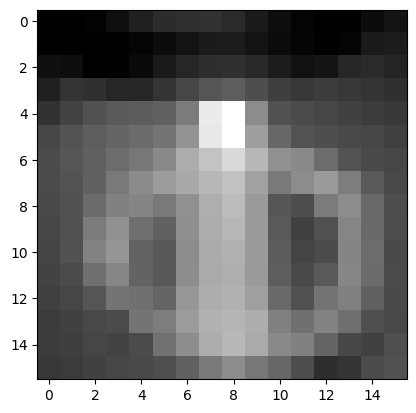

Label : good weld


In [13]:
import matplotlib.pyplot as plt
rand_img = np.random.randint(low = 0, high = len(X))
plt.imshow(X[rand_img], cmap='gray')
plt.show()
print(f"Label : {label_names[np.argmax(y[rand_img])]}")

In [26]:
total_data = len(X)
X_train, y_train = X[:int(total_data*0.8)], y[:int(total_data*0.8)]
X_test, y_test = X[int(total_data*0.8):], y[int(total_data*0.8):]

In [ ]:
X_train[0]

In [15]:
org_X_train,org_y_train,org_X_test,org_y_test = X_train,y_train,X_test,y_test

Label : lack of fusion


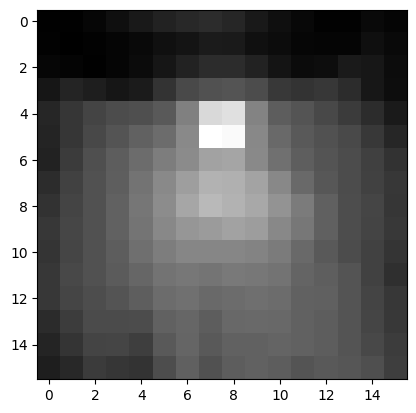

In [16]:
plt.imshow(X_train[0], cmap='gray')
print(f"Label : {label_names[y_train[0]]}")

In [27]:
# This means converting the 2D array of image pixels (16x16 pixels) into a 1D array.
X_train = [tf.reshape(x, [-1]) for x in org_X_train]
#y_train = [tf.reshape(y, [-1]) for y in y_train]

X_test = [tf.reshape(x, [-1]) for x in org_X_test]
#y_test = [tf.reshape(y, [-1]) for y in y_test]

In [28]:
X_train = np.array(X_train)
X_train = X_train.astype(np.int8)

In [ ]:
values, counts = np.unique([label_names[i] for i in y_train], return_counts=True)
print(values)
print(counts)

In [1]:
import pennylane as qml
from pennylane import numpy as np
from IPython.display import display

dev = qml.device("default.qubit", wires=8)


@qml.qnode(dev)
def circuit(image, template_weights):
    qml.AmplitudeEmbedding(features=image, wires=range(8), normalize=True)

    i = 0
    while(i < 8):
        qml.RY(template_weights[i], wires=i)
        i = i+1

    for j in range(0, 7, 2):
        qml.CNOT(wires=[j, j+1])

    for j in range(1, 6, 2):
        qml.RY(template_weights[i], wires=j)
        i = i+1
        qml.RY(template_weights[i], wires=j+1)
        i = i+1
        qml.CNOT(wires=[j, j+1])

    for j in range(2, 5, 2):
        qml.RY(template_weights[i], wires=j)
        i = i+1
        qml.RY(template_weights[i], wires=j+1)
        i = i+1
        qml.CNOT(wires=[j, j+1])

    #qml.CNOT(wires=[3, 5])

    return qml.probs([3, 5])

weights = np.random.random(size=[18, 1])
#fig, ax = qml.draw_mpl(circuit, expansion_strategy="device")(X_train[0], weights)
#fig.set_size_inches((6, 3.5))
qml.draw_mpl(circuit, expansion_strategy="device")(X_train[0], weights)
#circuit(X_train[0], weights)

NameError: name 'X_train' is not defined

C:\Users\marty\anaconda3\envs\Womanium_Project\lib\site-packages\autoray\autoray.py:80: RuntimeWarning: invalid value encountered in sqrt
  return get_lib_fn(backend, fn)(*args, **kwargs)


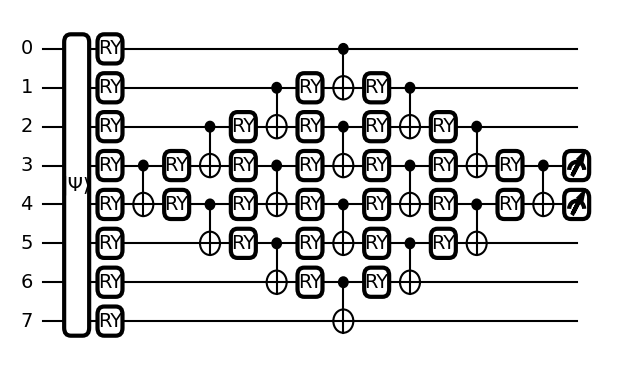

In [31]:
import pennylane as qml
from pennylane import numpy as np
from IPython.display import display
dev = qml.device("default.qubit", wires=8)


@qml.qnode(dev)
def circuit_peps(image, template_weights):
    qml.AmplitudeEmbedding(features=image, wires=range(8), normalize=True)

    i = 0

    qml.RY(template_weights[i], wires=3)
    i = i+1
    qml.RY(template_weights[i], wires=4)
    i = i+1
    qml.CNOT(wires=[3, 4])

    qml.RY(template_weights[i], wires=2)
    i = i+1
    qml.RY(template_weights[i], wires=3)
    i = i+1
    qml.CNOT(wires=[2, 3])

    qml.RY(template_weights[i], wires=4)
    i = i+1
    qml.RY(template_weights[i], wires=5)
    i = i+1
    qml.CNOT(wires=[4, 5])

    for j in range(1, 6, 2):
        qml.RY(template_weights[i], wires=j)
        i = i+1
        qml.RY(template_weights[i], wires=j+1)
        i = i+1
        qml.CNOT(wires=[j, j+1])

    for j in range(0, 7, 2):
        qml.RY(template_weights[i], wires=j)
        i = i+1
        qml.RY(template_weights[i], wires=j+1)
        i = i+1
        qml.CNOT(wires=[j, j+1])

    for j in range(1, 6, 2):
        qml.RY(template_weights[i], wires=j)
        i = i+1
        qml.RY(template_weights[i], wires=j+1)
        i = i+1
        qml.CNOT(wires=[j, j+1])

    qml.RY(template_weights[i], wires=2)
    i = i+1
    qml.RY(template_weights[i], wires=3)
    i = i+1
    qml.CNOT(wires=[2, 3])

    qml.RY(template_weights[i], wires=4)
    i = i+1
    qml.RY(template_weights[i], wires=5)
    i = i+1
    qml.CNOT(wires=[4, 5])

    qml.RY(template_weights[i], wires=3)
    i = i+1
    qml.RY(template_weights[i], wires=4)
    i = i+1
    qml.CNOT(wires=[3, 4])


    return qml.probs([3, 4])

weights = np.random.random(size=[32, 1])
fig, ax = qml.draw_mpl(circuit_peps, expansion_strategy="device")(X_train[0], weights)
fig.set_size_inches((6, 3.5))

In [37]:
len(y_train)

1283

In [38]:
len(X_train)

1924

In [34]:
def costfunc(params):
    cost = 0
    y_true = [np.array([1, 0, 0, 0]), np.array([0, 1, 0, 0]), np.array([0, 0, 1, 0]), np.array([0, 0, 0, 1])]
    len_X_train = len(X_train)
    for i in range(len_X_train):
        prob = circuit_peps(X_train[i], params)
        if y_train[i] == 0:
            cost -= 1/len_X_train * np.sum(np.sum(y_true[0].astype(float)*np.log(prob.astype(float))))
        elif y_train[i] == 1:
            cost -= 1/len_X_train * np.sum(np.sum(y_true[1].astype(float)*np.log(prob.astype(float))))
        elif y_train[i] == 2:
            cost -= 1/len_X_train * np.sum(np.sum(y_true[2].astype(float)*np.log(prob.astype(float))))
        elif y_train[i] == 3:
            cost -= 1/len_X_train * np.sum(np.sum(y_true[3].astype(float)*np.log(prob.astype(float))))
    return cost

In [35]:
# training the circuit parameters
x2 = np.random.random(size=[32, 1], requires_grad=True)
params = x2[:]
optimizer = qml.AdamOptimizer(stepsize=0.1)

for k in range(2):
    if k % 5 == 0:
        print(f"Step {k}, cost: {costfunc(params)}")
    params = optimizer.step(costfunc, params)
print(params)

C:\Users\marty\anaconda3\envs\Womanium_Project\lib\site-packages\autoray\autoray.py:80: RuntimeWarning: invalid value encountered in sqrt
  return get_lib_fn(backend, fn)(*args, **kwargs)


IndexError: list index out of range